# How to use TensforFlow 2.0 to define a Model as a Class in Python
## CPE 490 590
## Rahul Bhadani

In this notebook we create a general polynomial model using TensorFlow 2.0

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Generate synthetic data
np.random.seed(0)
n = 400
X = np.linspace(-10, 10, n)
Y = (X+3)**3 + 5 + np.random.normal(0, 2.0, n)

# Define the model
# Here we define general polynomial model
class Model(tf.keras.Model):
    def __init__(self, degree):
        super(Model, self).__init__()
        self.degree = degree
        self.dense = layers.Dense(1)

    def call(self, inputs):
        pow_x = []
        inputs = tf.expand_dims(inputs, axis=-1)  # Expand the dimensions of inputs
        for i in range(1, self.degree+1):
            pow_x.append(inputs**i)
        return self.dense(tf.concat(pow_x, axis=-1))


# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

2024-02-20 17:08:16.247957: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-20 17:08:16.250350: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-20 17:08:16.277743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 17:08:16.277765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 17:08:16.278583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Degree 1 model loss on training data: 219777.453125
Degree 1 model loss on test data: 332005.15625
3/3 [==============================] - 0s 1ms/step


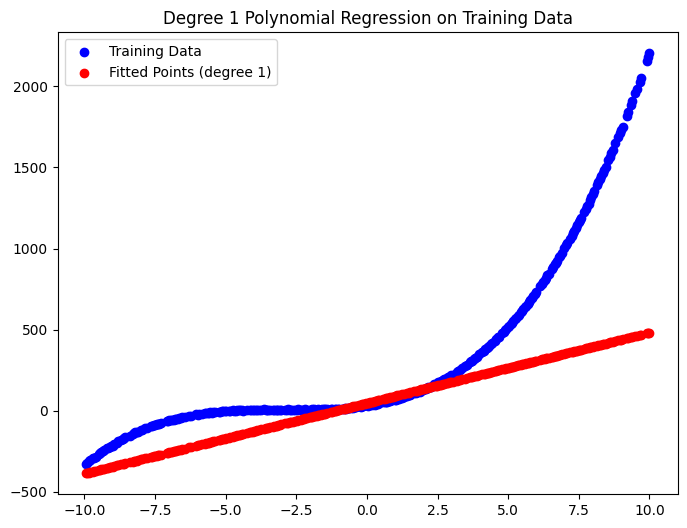

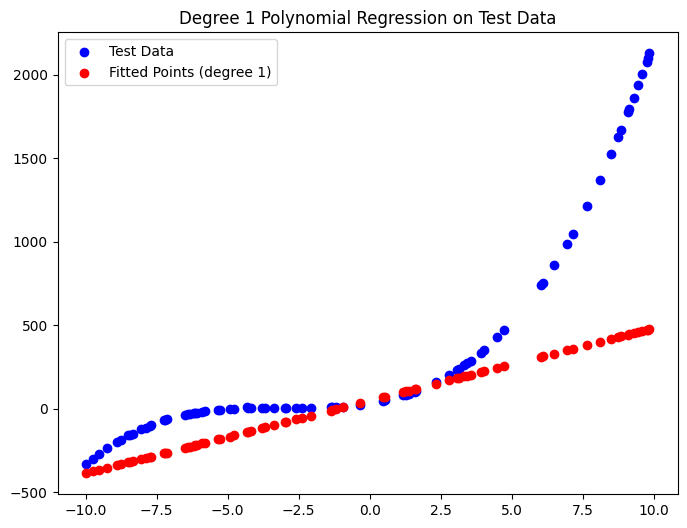

Degree 2 model loss on training data: 75940.6640625
Degree 2 model loss on test data: 112960.6484375
3/3 [==============================] - 0s 1ms/step


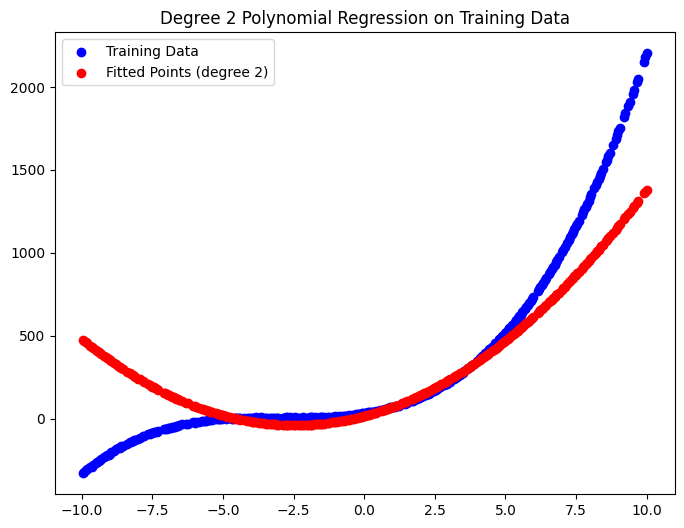

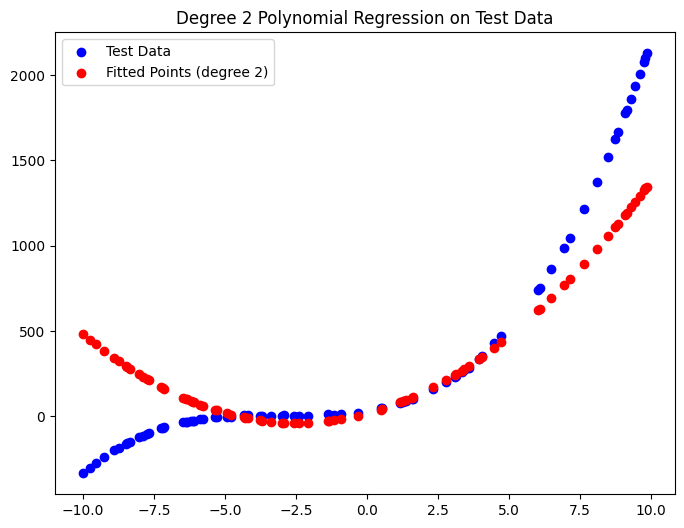

Degree 5 model loss on training data: 1383.517333984375
Degree 5 model loss on test data: 3566.0390625
3/3 [==============================] - 0s 1ms/step


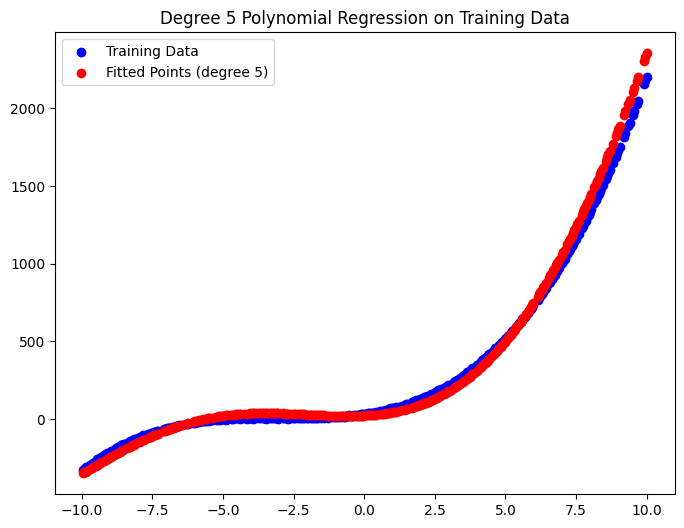

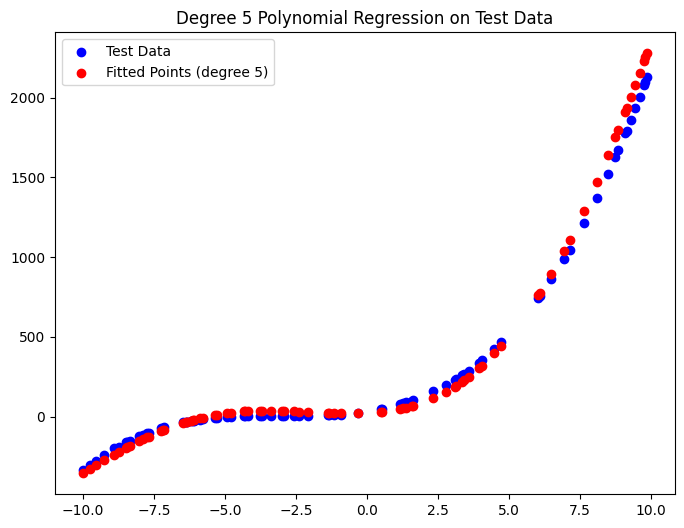

Degree 7 model loss on training data: 212565.40625
Degree 7 model loss on test data: 203202.078125
3/3 [==============================] - 0s 1ms/step


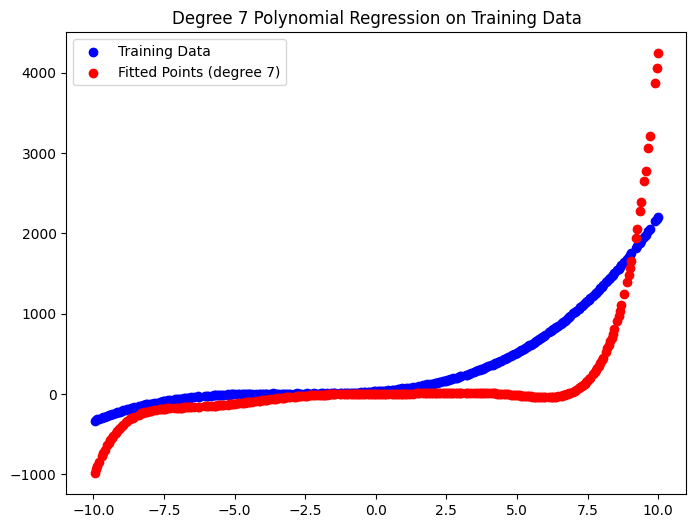

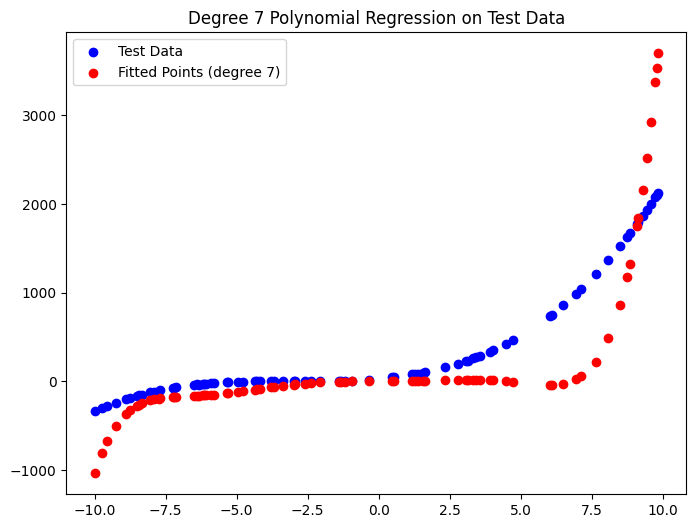

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Specify the learning rate
learning_rate = 0.01

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit models and demonstrate underfitting/overfitting
for degree in [1, 2, 5, 7]:
    model = Model(degree)
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn)
    history = model.fit(X_train, Y_train, epochs=500, verbose=0)
    print(f"Degree {degree} model loss on training data: {history.history['loss'][-1]}")

    # Evaluate the model on the test data
    test_loss = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Degree {degree} model loss on test data: {test_loss}")

    # Predict the output using the trained model
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    # Plot the data and the fitted curve for training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, color='blue', label='Training Data')
    plt.scatter(X_train, Y_pred_train, color='red', label=f'Fitted Points (degree {degree})')
    plt.legend()
    plt.title(f'Degree {degree} Polynomial Regression on Training Data')
    plt.show()

    # Plot the data and the fitted curve for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test, color='blue', label='Test Data')
    plt.scatter(X_test, Y_pred_test, color='red', label=f'Fitted Points (degree {degree})')
    plt.legend()
    plt.title(f'Degree {degree} Polynomial Regression on Test Data')
    plt.show()
